
# Analiza wpływu Mbappe i Viniciusa na wyniki Realu Madryt

## Cel projektu
Celem projektu jest analiza wpływu Kyliana Mbappé i Viníciusa Juniora na wyniki Realu Madryt, ze szczególnym uwzględnieniem:
- wpływu ich obecności na liczbę zdobywanych bramek przez drużynę,
- indywidualnego wkładu ofensywnego (gole + asysty),
- zależności pomiędzy tymi wynikami a siłą przeciwnika mierzoną rankingiem ELO.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


## Wczytanie danych

W analizie wykorzystano dane przygotowane w poprzednim etapie projektu (`01_data_preparation.ipynb`).
Zbiór danych zawiera informacje o:
- wynikach meczów Realu Madryt,
- obecności Mbappé i Viníciusa,
- liczbie goli i asyst obu zawodników,
- rankingu ELO przeciwników.


In [3]:
matches = pd.read_csv("matches_elo.csv")

In [4]:
matches.head()

,Unnamed: 0,Team_id,Team_name,Team_shortName,Score,goalsMadrid,goalsOpp,loc,date,Mbappe_play,Vini_play,MbappeG,MbappeA,ViniG,ViniA,eloMadrid,eloOpp
0,77,0,Atalanta BC,Atalanta,WIN,2,0,NEUTRAL,2024-08-14,YES,YES,1,0,0,1,1997.407959,1884.456909
1,0,89,RCD Mallorca,Mallorca,DRAW,1,1,AWAY,2024-08-18,YES,YES,0,0,0,1,1997.407959,1642.396118
2,1,250,Real Valladolid CF,Valladolid,WIN,3,0,HOME,2024-08-25,YES,YES,0,0,0,0,1990.887939,1600.702026
3,2,275,UD Las Palmas,Las Palmas,DRAW,1,1,AWAY,2024-08-29,YES,YES,0,0,1,0,1992.368896,1582.391235
4,3,90,Real Betis BalompiĂ©,Betis,WIN,2,0,HOME,2024-09-01,YES,YES,2,0,0,1,1985.119385,1711.915771



## Obecność zawodników a wyniki meczów

W tej części sprawdzono, jak zmieniają się wyniki meczów Realu Madryt w zależności od tego,
czy Mbappe lub Vinicius występowali w danym spotkaniu.


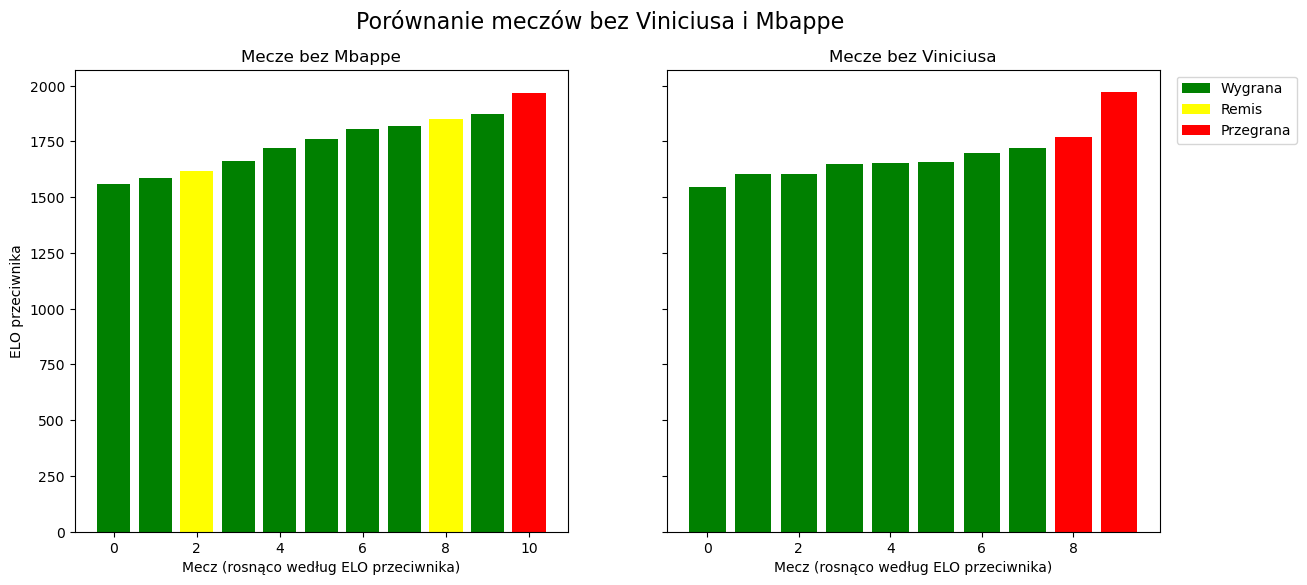

In [5]:
names = ['Mbappe', 'Vini']

df = []
colors = []

for i in range(2):
    df.append(matches[matches[f'{names[i]}_play'] == 'NO'].copy())

    # upewnienie się, że Score to string i bez spacji
    df[i]['Score'] = df[i]['Score'].astype(str).str.strip()

    color_map = {'WIN': 'green', 'DRAW': 'yellow', 'LOSS': 'red'}
    colors.append(df[i]['Score'].map(color_map))

    df[i] = df[i].sort_values('eloOpp')
    colors[i] = colors[i][df[i].index]

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

for i in range(2):
    axes[i].bar(range(len(df[i])), df[i]['eloOpp'], color=colors[i])
    axes[i].set_title(f'Mecze bez {names[i]}')
    axes[i].set_xlabel('Mecz (rosnąco według ELO przeciwnika)')
    legend_elements = [
        Patch(facecolor="green", label="Wygrana"),
        Patch(facecolor="yellow", label="Remis"),
        Patch(facecolor="red", label="Przegrana"),
    ]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left')
    
axes[0].set_ylabel('ELO przeciwnika')
axes[1].set_title('Mecze bez Viniciusa')

plt.suptitle('Porównanie meczów bez Viniciusa i Mbappe', fontsize=16)

plt.show()


Wykresy przedstawiają rezultaty meczów Realu podczas nieobecności Mbappe i Viniciusa w porównaniu z ELO przeciwników. Widzimy, że drużyna radzi sobie podobnie w meczach bez Mbappe i w meczach bez Viniciusa (7/10 wygranych bez Mbappe, 7/9 wygranych bez Viniciusa), ale porównując ELO w meczach na obu wykresach ewidentnie widzimy, że drużyna bez Viniciusa mierzy się z łatwiejszymi przeciwnikami niż bez Mbappe.

Jako że Vinicius w analizowanym przeze mnie okresie opuścili prawie taką samą liczbę meczów, dla lepszego porównania, możemy przedstawić ich mecze na jednym wykresie, żeby dokładnie porównać ELO przeciwników w meczach, w których wystąpili.

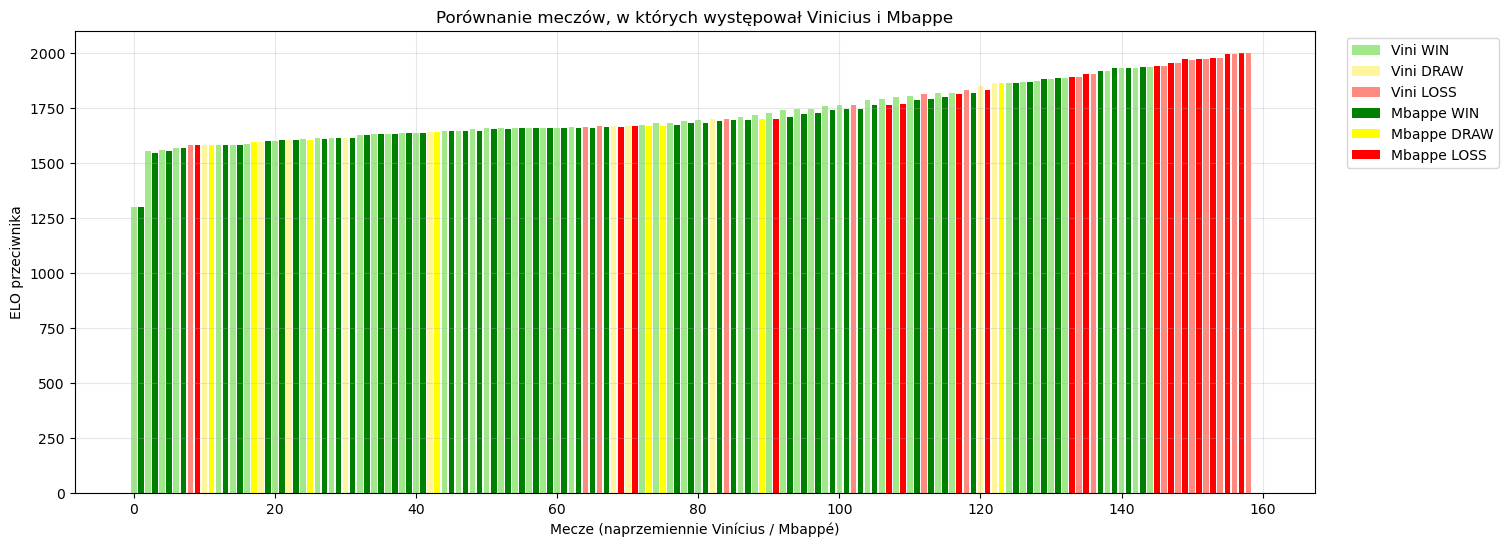

In [6]:
df_Vini = matches[matches["Vini_play"] == "YES"].copy()
df_Mbappe = matches[matches["Mbappe_play"] == "YES"].copy()

# upewnienie się, że Score to string i bez spacji
df_Vini["Score"] = df_Vini["Score"].astype(str).str.strip()
df_Mbappe["Score"] = df_Mbappe["Score"].astype(str).str.strip()

df_Vini_sorted = df_Vini.sort_values("eloOpp")
df_Mbappe_sorted = df_Mbappe.sort_values("eloOpp")

color_map_Mbappe = {"WIN": "green", "DRAW": "yellow", "LOSS": "red"}
colors_Mbappe = df_Mbappe_sorted["Score"].map(color_map_Mbappe)

color_map_Vini = {"WIN": "#a1e88b", "DRAW": "#fff59d", "LOSS": "#ff8a80"}  
colors_Vini = df_Vini_sorted["Score"].map(color_map_Vini)

n = max(len(df_Vini_sorted), len(df_Mbappe_sorted))
x = np.arange(2*n)

elo_combined = []
colors_combined = []

for i in range(n):
    if i < len(df_Vini_sorted):
        elo_combined.append(df_Vini_sorted["eloOpp"].iloc[i])
        colors_combined.append(colors_Vini.iloc[i])
    else:
        elo_combined.append(0)
        colors_combined.append("white")
    if i < len(df_Mbappe_sorted):
        elo_combined.append(df_Mbappe_sorted["eloOpp"].iloc[i])
        colors_combined.append(colors_Mbappe.iloc[i])
    else:
        elo_combined.append(0)
        colors_combined.append("white")

plt.figure(figsize=(16,6))
plt.bar(x, elo_combined, color=colors_combined, width=0.8)

plt.xlabel("Mecze (naprzemiennie Vinícius / Mbappé)")
plt.ylabel("ELO przeciwnika")
plt.title("Porównanie meczów, w których występował Vinicius i Mbappe")

legend_elements = [
    Patch(facecolor="#a1e88b", label="Vini WIN"),
    Patch(facecolor="#fff59d", label="Vini DRAW"),
    Patch(facecolor="#ff8a80", label="Vini LOSS"),
    Patch(facecolor="green", label="Mbappe WIN"),
    Patch(facecolor="yellow", label="Mbappe DRAW"),
    Patch(facecolor="red", label="Mbappe LOSS"),
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.grid(True, alpha=0.3)
plt.show()


Na wykresie przedstawiono porównanie wyników meczów, kiedy grał Vinicius (jaśniejsze odcienie) i Mbappe, gdzie ich mecze są posortowane według ELO przeciwników. Wykres rośnie mniej więcej równomiernie do meczu numer 63 (oś x), ale od miejsca 64 do 121 zgodnie z tym czego można się spodziewać po wcześniejszym porównaniu, w meczach Viniciusa przeciwnicy mają wyższe ELO. Na tym przedziale wyniki są podobne (Vinicius 19 w., 4 r., 6p., Mbappe 19w., 3r., 7p.), ale na rzecz Viniciusa działa fakt trudniejszych meczy.

#### Wniosek:
Drużyna radzi sobie lepiej bez Mbappe niż bez Viniciusa, ponieważ mimo podobnych wyników względem obecności zawodników w meczu, mecze w których występuje Vinicius są rozgrywane częściej na trudniejszych przeciwników.

## Wpływ obecności zawodników na wyniki bramkowe drużyny

W tej części porównano wpływ obecności Mbappe i Viniciusa w meczu na ilość bramek zdobywanych i traconych przez drużynę względem ELO przeciwników. Następnie sprawdzono te same wyniki przeciwko drużynom o ELO > 1800.

W dalszej analizie nie jest brany pod uwagę mecz przeciwko Kairatowi z dnia 30.09.2025, ponieważ drużyna ta ma około 1300 ELO, więc znacznie odbiega od drugiej najgorszej drużyny, która ma powyżej 1500 ELO. Uwzględnienie tej drużyny może zakrzywić obserwacje oraz sprawić, że wizualizacja na wykresie będzie mniej przejrzysta.

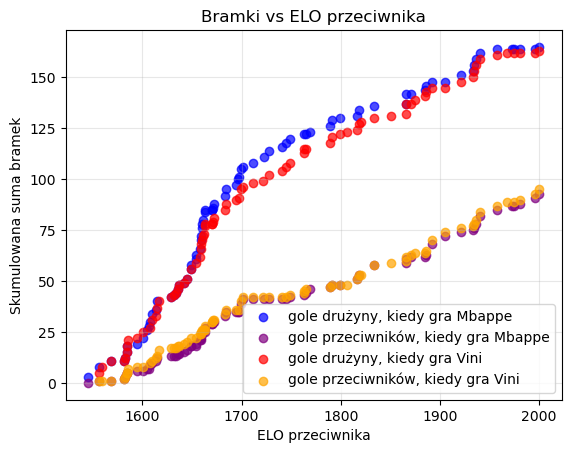

In [7]:
dfs = [matches[matches['Mbappe_play'] == 'YES'].copy(), matches[matches['Vini_play'] == 'YES'].copy()]
names = ['Mbappe', 'Vini']
colors = ['blue', 'red', 'purple' , 'orange']

for i in range(2):
    G_elo = dfs[i][['goalsMadrid','eloOpp']].copy()
    G_elo = G_elo.sort_values('eloOpp')
    G_elo = G_elo[G_elo['eloOpp'] > 1400]
    G_elo['goals_cumsum'] = G_elo['goalsMadrid'].cumsum()

    L_elo = dfs[i][['goalsOpp','eloOpp']].copy()
    L_elo = L_elo.sort_values('eloOpp')
    L_elo = L_elo[L_elo['eloOpp'] > 1400]
    L_elo['goals_cumsum'] = L_elo['goalsOpp'].cumsum()

    plt.scatter(
        G_elo["eloOpp"],
        G_elo["goals_cumsum"],
        color=colors[i],
        alpha=0.7,
        label=f'gole drużyny, kiedy gra {names[i]}'
    )
    
    plt.scatter(
        L_elo["eloOpp"],
        L_elo["goals_cumsum"],
        color=colors[i+2],
        alpha=0.7,
        label=f"gole przeciwników, kiedy gra {names[i]}"
    )

plt.xlabel("ELO przeciwnika")
plt.ylabel("Skumulowana suma bramek")
plt.title("Bramki vs ELO przeciwnika")

plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

Na wykresie przedstawiono przyrost bramek strzelonych i straconych względem wzrostu ELO przeciwników Realu. Widzimy, że ilość bramek traconych jest praktycznie taka sama dla obu zawodników, natomiast jeśli chodzi o bramki strzelone, to w meczach z Mbappe drużyna częściej trafia do bramki. Różnica jest szczególnie widoczna w przedziale ELO przeciwników [~1650, ~1800], ale po ELO 1800 wyniki są bardzo podobne. Sprawdźmy zatem jak będzie się to prezentować jeśli ograniczymy się do przeciwników z ELO > 1800.

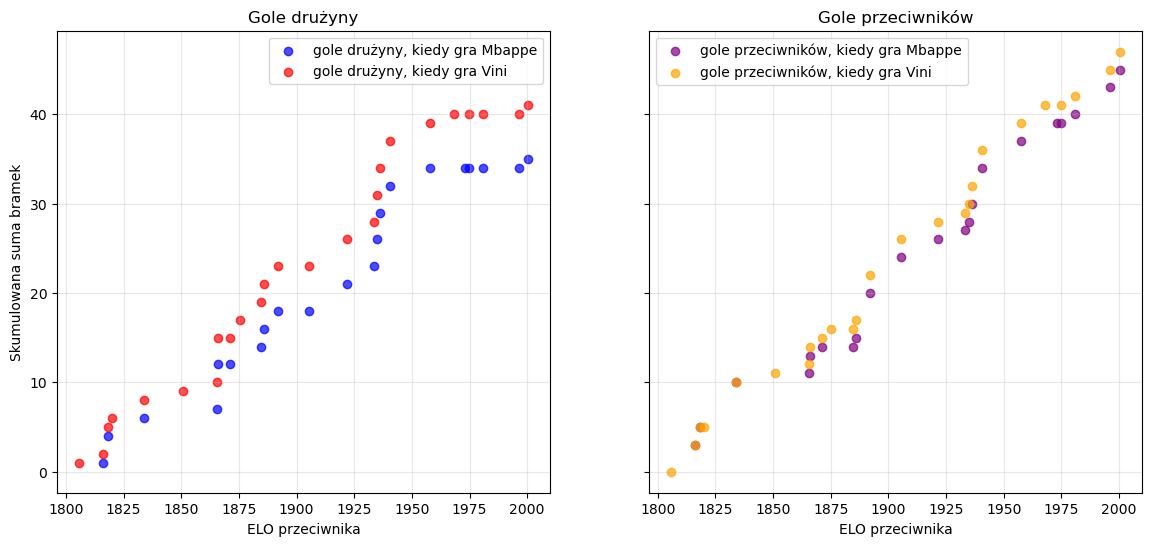

In [10]:
dfs = [matches[matches['Mbappe_play'] == 'YES'].copy(), matches[matches['Vini_play'] == 'YES'].copy()]
names = ['Mbappe', 'Vini']
colors = ['blue', 'red', 'purple' , 'orange']

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i in range(2):
    G_elo = dfs[i][['goalsMadrid','eloOpp']].copy()
    G_elo = G_elo.sort_values('eloOpp')
    G_elo = G_elo[G_elo['eloOpp'] > 1800]
    G_elo['goals_cumsum'] = G_elo['goalsMadrid'].cumsum()

    L_elo = dfs[i][['goalsOpp','eloOpp']].copy()
    L_elo = L_elo.sort_values('eloOpp')
    L_elo = L_elo[L_elo['eloOpp'] > 1800]
    L_elo['goals_cumsum'] = L_elo['goalsOpp'].cumsum()

    axes[0].scatter(
        G_elo['eloOpp'],
        G_elo['goals_cumsum'],
        color=colors[i],
        alpha=0.7,
        label=f'gole drużyny, kiedy gra {names[i]}'
    )
    axes[0].set_title('Gole drużyny')
    axes[0].set_xlabel('ELO przeciwnika')
    axes[0].set_ylabel('Skumulowana suma bramek')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].scatter(
        L_elo['eloOpp'],
        L_elo['goals_cumsum'],
        color=colors[i+2],
        alpha=0.7,
        label=f'gole przeciwników, kiedy gra {names[i]}'
    )
    axes[1].set_title('Gole przeciwników')
    axes[1].set_xlabel('ELO przeciwnika')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)


plt.show()

In [11]:
print('Ilość meczy Mbappe na przeciwników o ELO > 1800:', len(matches[(matches['Mbappe_play'] == 'YES') & (matches['eloOpp'] > 1800)]))
print('Ilość meczy Viniciusa na przeciwników o ELO > 1800:', len(matches[(matches['Vini_play'] == 'YES') & (matches['eloOpp'] > 1800)]))

Ilość meczy Mbappe na przeciwników o ELO > 1800: 21
Ilość meczy Viniciusa na przeciwników o ELO > 1800: 25


Z wykresu po lewej stronie wynika, że drużyna strzela więcej goli na trudniejszych przeciwników z Viniciusem niż z Mbappe. Jednak Vinicius ma o 5 więcej takich meczów. Przeskalujmy zatem gole w meczach z Mbappe mnożąc przez (mecze z Viniciusem / mecze z Mbappe) = (25 / 21).

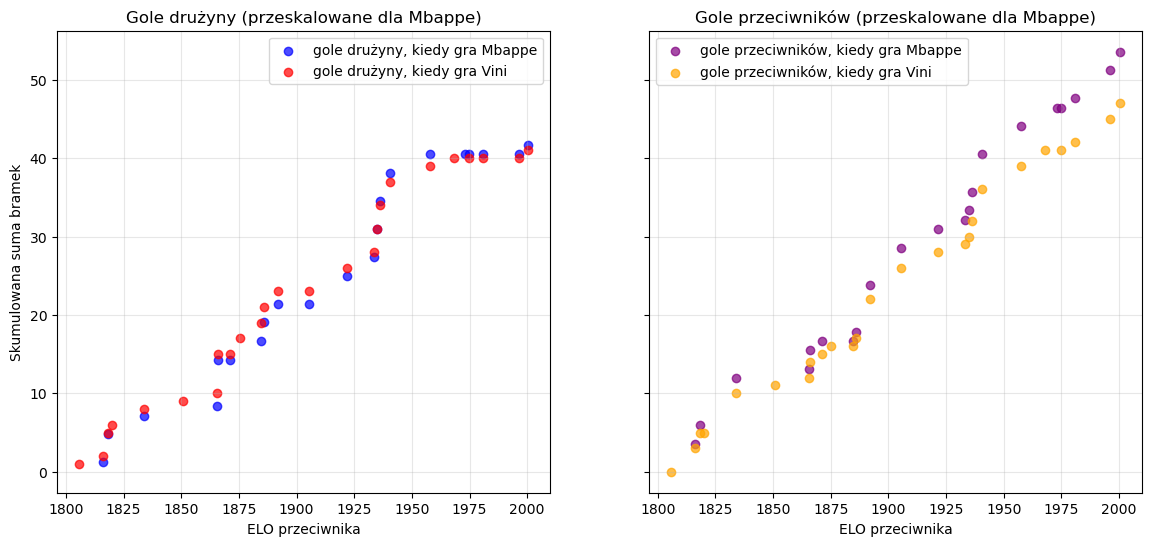

In [12]:
dfs = [matches[matches['Mbappe_play'] == 'YES'].copy(), matches[matches['Vini_play'] == 'YES'].copy()]
names = ['Mbappe', 'Vini']
colors = ['blue', 'red', 'purple' , 'orange']

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i in range(2):
    G_elo = dfs[i][['goalsMadrid','eloOpp']].copy()
    G_elo = G_elo.sort_values('eloOpp')
    G_elo = G_elo[G_elo['eloOpp'] > 1800]
    if i == 0:
        G_elo['goalsMadrid'] = G_elo['goalsMadrid'] * (25/21)
    G_elo['goals_cumsum'] = G_elo['goalsMadrid'].cumsum()

    L_elo = dfs[i][['goalsOpp','eloOpp']].copy()
    L_elo = L_elo.sort_values('eloOpp')
    L_elo = L_elo[L_elo['eloOpp'] > 1800]
    if i == 0:
        L_elo['goalsOpp'] = L_elo['goalsOpp'] * (25/21)
    L_elo['goals_cumsum'] = L_elo['goalsOpp'].cumsum()

    axes[0].scatter(
        G_elo['eloOpp'],
        G_elo['goals_cumsum'],
        color=colors[i],
        alpha=0.7,
        label=f'gole drużyny, kiedy gra {names[i]}'
    )
    axes[0].set_title('Gole drużyny (przeskalowane dla Mbappe)')
    axes[0].set_xlabel('ELO przeciwnika')
    axes[0].set_ylabel('Skumulowana suma bramek')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].scatter(
        L_elo['eloOpp'],
        L_elo['goals_cumsum'],
        color=colors[i+2],
        alpha=0.7,
        label=f'gole przeciwników, kiedy gra {names[i]}'
    )
    axes[1].set_title('Gole przeciwników (przeskalowane dla Mbappe)')
    axes[1].set_xlabel('ELO przeciwnika')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)


plt.show()

Po przeskalowaniu na wykresie widać, że drużyna strzela tyle samo bramek z Viniciusem i z Mbappe na przeciwników o ELO > 1800, natomiast w meczach z Mbappe traci więcej.

### Wniosek:
Drużyna z Viniciusem ma gorsze wyniki bramkowe, jeśli spojrzymy na wszystkie mecze. Ale jeśli weźmiemy pod uwagę mecze przeciwko lepszym przeciwnikom róznice te się zacierają, a nawet można wskazać lekką przewagę Viniciusa.

## Porównanie udziałów bramkowych Mbappe i Viniciusa

W tej części porównano udziały bramkowe zawodników względem ELO przeciwników, ponownie sprawdzając wyniki dla wszystkich meczów oraz meczów przeciwko drużynom o ELO > 1800.

In [13]:
matches["MbappeG+A"] = matches["MbappeG"].fillna(0) + matches["MbappeA"].fillna(0)
matches["ViniG+A"] = matches["ViniG"].fillna(0) + matches["ViniA"].fillna(0)

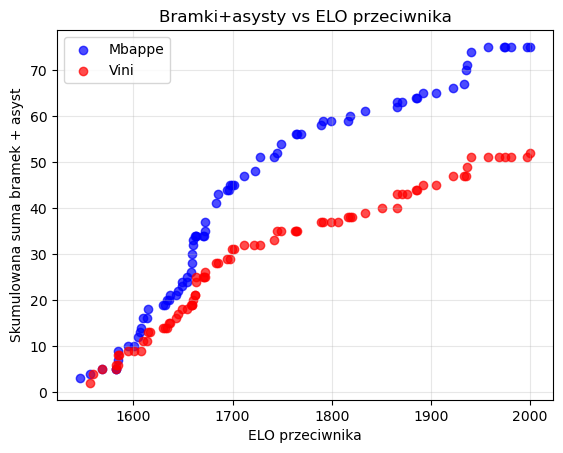

In [14]:
names = ['Mbappe', 'Vini']
colors = ['Blue', 'Red']

for i in range(2):
    GA_elo = matches[matches[f'{names[i]}_play'] == 'YES'][[f'{names[i]}G+A','eloOpp']].copy()
    GA_elo = GA_elo.sort_values('eloOpp')
    GA_elo = GA_elo[GA_elo['eloOpp'] > 1400]
    GA_elo['G+A_cumsum'] = GA_elo[f'{names[i]}G+A'].cumsum() 

    plt.scatter(
        GA_elo["eloOpp"],
        GA_elo["G+A_cumsum"],
        color=colors[i],
        alpha=0.7,
        label=names[i]
    )


plt.xlabel("ELO przeciwnika")
plt.ylabel("Skumulowana suma bramek + asyst")
plt.title("Bramki+asysty vs ELO przeciwnika")

plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

Wykres pokazuje, że Mbappe ma znacznie więcej udziałów od Viniciusa, a różnica zaczyna się wyraźnie kształtować od ELO ~1650. Widzimy jednak, że ponownie od około 1800 ELO wykresy dla obu zawodników mają podobny kształt. Przeanalizujmy więc teraz mecze przeciwko drużynom o ELO > 1800.

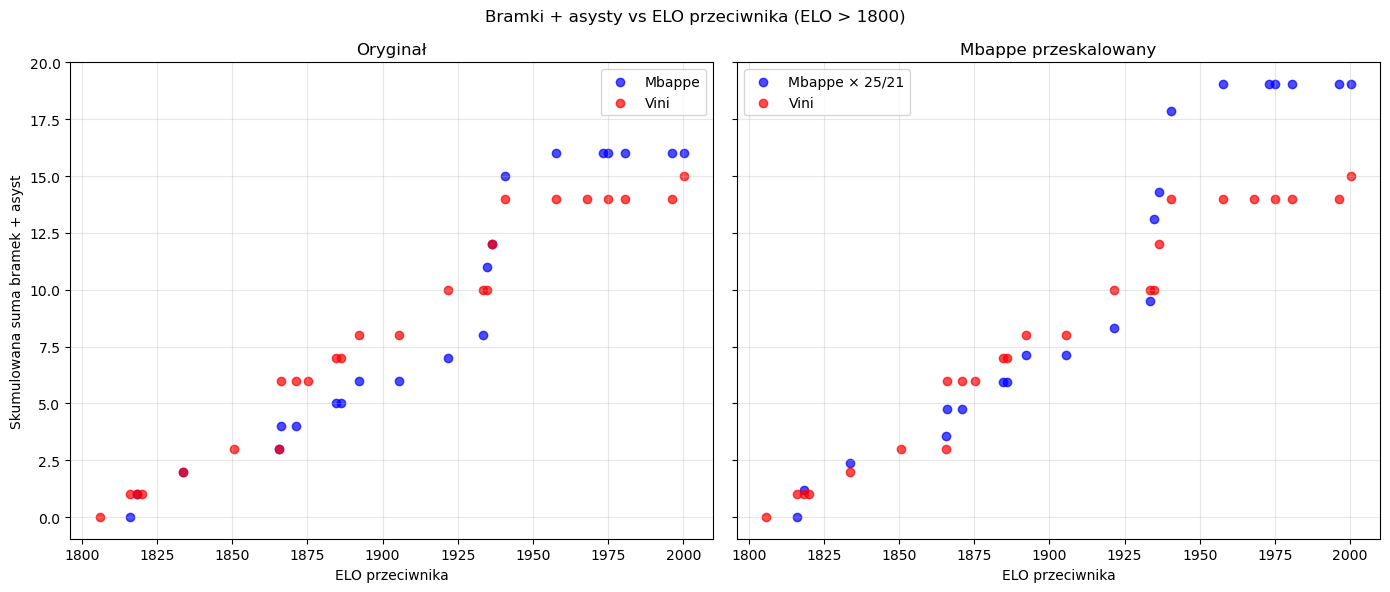

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

names = ['Mbappe', 'Vini']
colors = ['Blue', 'Red']
scale_factor = 25 / 21

for i in range(2):
    GA_elo = matches[matches[f'{names[i]}_play'] == 'YES'][[f'{names[i]}G+A', 'eloOpp']].copy()
    GA_elo = GA_elo.sort_values('eloOpp')
    GA_elo = GA_elo[GA_elo['eloOpp'] > 1800]
    GA_elo['G+A_cumsum'] = GA_elo[f'{names[i]}G+A'].cumsum()

    axes[0].scatter(
        GA_elo['eloOpp'],
        GA_elo['G+A_cumsum'],
        color=colors[i],
        alpha=0.7,
        label=names[i]
    )

    y_right = GA_elo['G+A_cumsum']
    label_right = names[i]

    if i == 0:
        y_right = y_right * scale_factor
        label_right = f"{names[i]} × 25/21"

    axes[1].scatter(
        GA_elo['eloOpp'],
        y_right,
        color=colors[i],
        alpha=0.7,
        label=label_right
    )

axes[0].set_title("Oryginał")
axes[1].set_title("Mbappe przeskalowany")

for ax in axes:
    ax.set_xlabel("ELO przeciwnika")
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Skumulowana suma bramek + asyst")
axes[0].legend()
axes[1].legend()

plt.suptitle("Bramki + asysty vs ELO przeciwnika (ELO > 1800)")
plt.tight_layout()
plt.show()


Na lewym wykresie widać, że udziały bramkowe na przeciwników o ELO > 1800 są podobne dla obu zawodników. Po przeskalowaniu bramek + asyst Mbappe o (mecze Viniciusa / mecze Mbappe) = (25 / 21) na prawym wykresie ich wyniki są dalej bardzo zbliżone, a różnica pojawia się dla ELO > 1940.

### Wniosek:

Różnice pomiędzy Mbappe i Viniciusem są mniej widoczne w meczach przeciwko silniejszym rywalom (wysokie ELO). Sugeruje to, że wpływ zawodników na ofensywę drużyny nie jest jednakowy w zależności od klasy przeciwnika, co może mieć znaczenie przy analizie ich skuteczności w kluczowych spotkaniach.

## Podsumowanie

Analiza wskazuje, że obecność Mbappe częściej koreluje z wyższą liczbą zdobywanych bramek przez Real Madryt, jednak  w meczach przeciwko silniejszym rywalom - Vinicius wykazuje porównywalny, a momentami nawet większy wpływ ofensywny. Wyniki sugerują, że ocena skuteczności zawodników powinna uwzględniać kontekst meczu oraz klasę przeciwnika, a nie wyłącznie surowe statystyki bramek i asyst.

Projekt pokazuje pełny proces analizy danych: od przygotowania zbioru danych, przez eksplorację, aż po wizualizację i interpretację wyników.